In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [3]:
if not os.path.isfile("data/Food-5k.zip"):
    ! curl -o "data/Food-5k.zip" "https://archive.org/download/food-5-k/Food-5K.zip"

#### Nota:
Siccome il link non funzionava, ho scaricato il dataset da kaggle. Questo è in forma "train - evaluate - validate", ognuno contenente due folder: una per la classe food, una per la classe non_food.

Il dataset al link, invece, aveva i dati strutturati in maniera diversa. Per questo motivo sarebbe stato necessario compiere una serie di modifiche, splittando manualmente i file.

In [8]:
train_path = "data/Food-5k/training"
val_path = "data/Food-5k/evaluation"

In [27]:
IMAGE_SIZE = [200, 200]

In [10]:
# Cerchiamo di capire quanti campioni abbiamo usando la funzione glob cercando tutti i file jpg
image_files = glob(train_path + "/*/*.jpg")
val_image_files = glob(val_path + "/*/*.jpg")

In [19]:
# Qui invece il numero di classi
folders = glob(train_path+"/*")
classes = len(folders)
folders

['data/Food-5k/training\\food', 'data/Food-5k/training\\non_food']

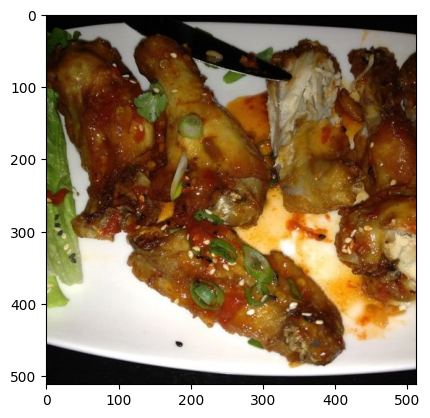

In [15]:
plt.imshow(image.load_img(np.random.choice(image_files)));

In [28]:
vgg16 = PretrainedModel(
    input_shape=IMAGE_SIZE+[3],
    weights="imagenet", # Permette di scaricare i pesi di VGG16 basato sul dataset imagenet
    include_top=False # Choppiamo via la testa della rete, tenendo solo le convoluzioni
)

In [29]:
vgg16.trainable = False

In [30]:
# Da qui costruiamo la nostra testa
o = Flatten()(vgg16.output)
o = Dense(classes, activation="softmax")(o) # Siccome stiamo usando il data generator, avremo la classificazione 1hotencoded, quindi softmax

In [31]:
model = Model(inputs=vgg16.input, outputs=o)

In [32]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │          36,866 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,751,554 (56.27 MB)

 Trainable params: 36,866 (144.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

In [34]:
batch_size = 128

train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)

Found 3000 images belonging to 2 classes.


In [35]:
val_generator = gen.flow_from_directory(
    val_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)

Found 1000 images belonging to 2 classes.


In [37]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [40]:
r = model.fit(
    train_generator, 
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9653 - loss: 0.8157

C:\Users\emili\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 219s 9s/step - accuracy: 0.9653 - loss: 0.8166 - val_accuracy: 0.9550 - val_loss: 1.4788
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 216s 9s/step - accuracy: 0.9779 - loss: 0.4935 - val_accuracy: 0.9590 - val_loss: 1.1898
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 215s 9s/step - accuracy: 0.9845 - loss: 0.2958 - val_accuracy: 0.9660 - val_loss: 1.0793
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 215s 9s/step - accuracy: 0.9802 - loss: 0.4192 - val_accuracy: 0.9610 - val_loss: 1.0419
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 216s 9s/step - accuracy: 0.9831 - loss: 0.3788 - val_accuracy: 0.9670 - val_loss: 1.1546
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 215s 9s/step - accuracy: 0.9901 - loss: 0.2825 - val_accuracy: 0.9650 - val_loss: 1.2650
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 215s 9s/step - accuracy: 0.9866 - loss: 0.2758 - val_accuracy: 0.9650 - val_loss: 1.4404
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 215s 9s/step - accuracy: 0.9906 - loss: 0.1881 - val_accuracy: 0.9720 - val_loss: 1.

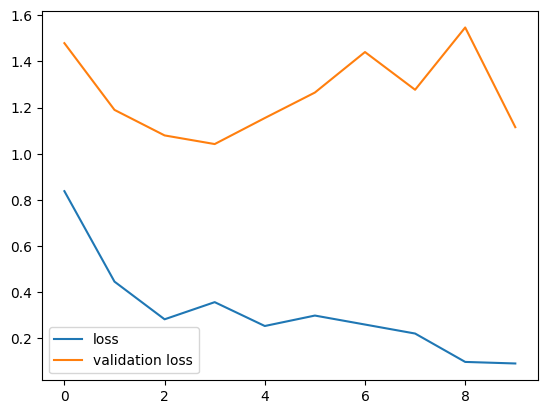

In [41]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()

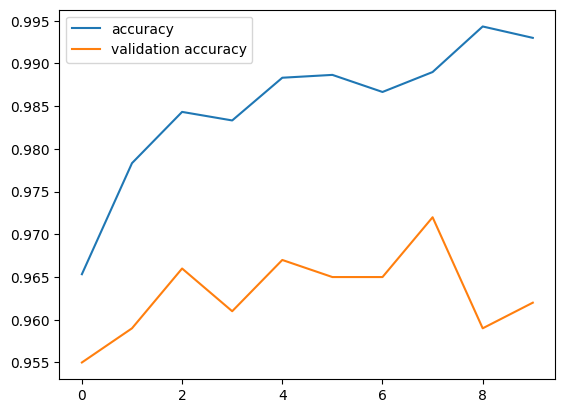

In [42]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend()